In [1]:
!pip install ultralytics -qU

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.6/780.6 kB 4.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 36.8 MB/s eta 0:00:00


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# unzip the ASL dataset
!unzip -q "/content/drive/MyDrive/ASL-dataset.zip" -d "/content/dataset/"

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import cv2
from ultralytics import YOLO

import warnings
warnings.filterwarnings('ignore')

# Dataset Visualization

In [5]:
label_map = {i: chr(65+i) for i in range(26)}

In [6]:
def vis_img_annotation(img_path, annotation_path):
    # Read the image
    img = cv2.imread(img_path)
    img_height, img_width, _ = img.shape
    # Read annotations
    with open(annotation_path, 'r') as f:
        annotations = f.readlines()
    # Process the first annotation (assuming single line for simplicity)
    annotations = annotations[0].split()
    label = int(annotations[0])
    x_center_norm = float(annotations[1])
    y_center_norm = float(annotations[2])
    w_norm = float(annotations[3])
    h_norm = float(annotations[4])
    # Convert normalized coordinates to actual pixel values
    x_center = int(x_center_norm * img_width)
    y_center = int(y_center_norm * img_height)
    w = int(w_norm * img_width)
    h = int(h_norm * img_height)
    # Calculate top-left corner of the bounding box
    x = x_center - w // 2
    y = y_center - h // 2
    # Draw rectangle and label
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(img, label_map[label], (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    # Convert BGR to RGB for plt.imshow()
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Display the image
    plt.imshow(img_rgb)
    plt.axis('off')  # Hide axes
    plt.show()

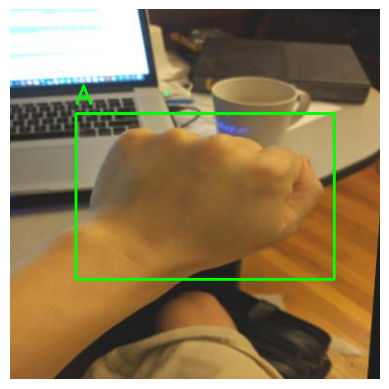

In [7]:
IMG_PATH = "/content/dataset/train/images/A0_jpg.rf.292a080422ba984985192f413101af41.jpg"
ANNOTATION_PATH = "/content/dataset/train/labels/A0_jpg.rf.292a080422ba984985192f413101af41.txt"
vis_img_annotation(IMG_PATH, ANNOTATION_PATH)

# Modeling
Code inspo [here](https://medium.com/@yongsun.yoon/fine-tuning-yolov8-using-custom-dataset-generated-by-open-world-object-detector-5724e267645d)

In [8]:
DATA_CONFIG_PATH = "/content/dataset/data.yaml"

In [9]:
# initiate model
model = YOLO('yolov8n.pt')

# fine tune the model
model.train(data=DATA_CONFIG_PATH, epochs=30)

100%|██████████| 6.23M/6.23M [00:00<00:00, 59.2MB/s]


Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/dataset/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_

100%|██████████| 755k/755k [00:00<00:00, 14.8MB/s]


Overriding model.yaml nc=80 with nc=26

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/dataset/train/labels... 1512 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1512/1512 [00:00<00:00, 1767.04it/s]

train: New cache created: /content/dataset/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/dataset/valid/labels... 144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 144/144 [00:00<00:00, 1739.59it/s]

val: New cache created: /content/dataset/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000333, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.52G      1.043      4.239      1.477         18        640: 100%|██████████| 95/95 [00:39<00:00,  2.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:03<00:00,  1.36it/s]

                   all        144        144     0.0291      0.793      0.158      0.133



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.35G     0.9084      3.493      1.368         16        640: 100%|██████████| 95/95 [00:32<00:00,  2.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.48it/s]


                   all        144        144      0.323      0.374      0.317       0.24

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.35G     0.9164      3.009      1.369         17        640: 100%|██████████| 95/95 [00:33<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]

                   all        144        144      0.451      0.528      0.486      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.35G      0.871      2.726      1.325         18        640: 100%|██████████| 95/95 [00:30<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.84it/s]

                   all        144        144      0.513      0.493      0.616      0.469



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.34G     0.8436       2.45      1.282         18        640: 100%|██████████| 95/95 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.71it/s]


                   all        144        144      0.521      0.646      0.651      0.509

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.34G     0.8157      2.181      1.249         17        640: 100%|██████████| 95/95 [00:33<00:00,  2.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.42it/s]

                   all        144        144      0.712      0.766      0.808      0.634



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.35G     0.8079      1.998      1.243         16        640: 100%|██████████| 95/95 [00:31<00:00,  2.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.79it/s]

                   all        144        144      0.803      0.719      0.841      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.34G     0.7778      1.881      1.216         20        640: 100%|██████████| 95/95 [00:29<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.01it/s]

                   all        144        144      0.669      0.792      0.855      0.665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.34G      0.762       1.76      1.201         18        640: 100%|██████████| 95/95 [00:30<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]

                   all        144        144      0.699       0.81       0.87      0.653



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.34G      0.757      1.655      1.204         15        640: 100%|██████████| 95/95 [00:33<00:00,  2.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.39it/s]


                   all        144        144      0.814      0.762      0.898      0.716

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.35G     0.7489      1.566      1.187         18        640: 100%|██████████| 95/95 [00:31<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.91it/s]

                   all        144        144      0.785      0.864       0.92      0.695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.34G     0.7235      1.524      1.166         16        640: 100%|██████████| 95/95 [00:30<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.12it/s]


                   all        144        144      0.779       0.87      0.927      0.761

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.34G     0.7102      1.459      1.165         18        640: 100%|██████████| 95/95 [00:33<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.41it/s]


                   all        144        144      0.811      0.804      0.902       0.73

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.34G     0.7044       1.37      1.169         16        640: 100%|██████████| 95/95 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  1.76it/s]

                   all        144        144      0.804      0.897      0.942      0.747



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.35G     0.6896      1.328      1.151         18        640: 100%|██████████| 95/95 [00:29<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.45it/s]


                   all        144        144       0.87      0.831      0.933      0.726

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.34G     0.6886      1.313      1.152         13        640: 100%|██████████| 95/95 [00:33<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.61it/s]


                   all        144        144      0.843      0.898      0.944       0.77

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.34G     0.6769      1.237      1.128         11        640: 100%|██████████| 95/95 [00:32<00:00,  2.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.35it/s]

                   all        144        144      0.879      0.889      0.956      0.771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.34G     0.6608      1.175      1.126         19        640: 100%|██████████| 95/95 [00:29<00:00,  3.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

                   all        144        144       0.88       0.88      0.954      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.35G     0.6536       1.17      1.122         14        640: 100%|██████████| 95/95 [00:31<00:00,  2.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.53it/s]


                   all        144        144      0.906      0.856      0.943      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.34G     0.6646      1.136      1.121         18        640: 100%|██████████| 95/95 [00:33<00:00,  2.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.36it/s]

                   all        144        144      0.926      0.872      0.953      0.788


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.48G     0.4888     0.9277      1.033          8        640: 100%|██████████| 95/95 [00:30<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.22it/s]

                   all        144        144      0.892      0.864      0.953      0.765



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.34G     0.4787     0.8435      1.027          8        640: 100%|██████████| 95/95 [00:29<00:00,  3.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.79it/s]

                   all        144        144      0.823      0.927      0.953      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.35G     0.4629     0.7926      1.027          8        640: 100%|██████████| 95/95 [00:31<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.25it/s]


                   all        144        144       0.85      0.921      0.948      0.757

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.34G     0.4466     0.7579      1.004          8        640: 100%|██████████| 95/95 [00:27<00:00,  3.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.71it/s]


                   all        144        144      0.907      0.875      0.946      0.765

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.34G     0.4424     0.7407      1.005          8        640: 100%|██████████| 95/95 [00:31<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.85it/s]

                   all        144        144      0.893      0.886       0.95      0.783



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.35G     0.4234     0.7028     0.9888          8        640: 100%|██████████| 95/95 [00:28<00:00,  3.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.07it/s]

                   all        144        144      0.897      0.914      0.956      0.769



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.35G     0.4228     0.6861      0.989          8        640: 100%|██████████| 95/95 [00:28<00:00,  3.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.46it/s]

                   all        144        144       0.91      0.922      0.962      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.34G     0.4121     0.6636      0.975          8        640: 100%|██████████| 95/95 [00:30<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  2.73it/s]

                   all        144        144      0.924      0.904      0.963      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.34G     0.4067     0.6597     0.9778          8        640: 100%|██████████| 95/95 [00:26<00:00,  3.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.10it/s]

                   all        144        144      0.928      0.905      0.962      0.805



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.34G     0.4001     0.6446     0.9686          8        640: 100%|██████████| 95/95 [00:31<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:01<00:00,  3.55it/s]

                   all        144        144      0.912      0.917      0.962      0.788



30 epochs completed in 0.285 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.3MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.3MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3010718 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:04<00:00,  1.20it/s]


                   all        144        144      0.929      0.904      0.962      0.804
                     A          5          5      0.982        0.8      0.895      0.779
                     B          9          9          1      0.968      0.995      0.868
                     C          3          3      0.943          1      0.995      0.807
                     D          6          6      0.883          1      0.995      0.845
                     E          4          4      0.946          1      0.995      0.846
                     F          8          8       0.96          1      0.995      0.862
                     G          5          5      0.822          1      0.995      0.837
                     H          9          9          1      0.961      0.995      0.732
                     I          2          2      0.854        0.5      0.572      0.515
                     J          8          8      0.978          1      0.995      0.553
                     

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x797f235265c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.04104

In [10]:
model.export(format='pb')

Ultralytics YOLOv8.2.32 🚀 Python-3.10.12 torch-2.3.0+cu121 CPU (Intel Xeon 2.30GHz)
Model summary (fused): 168 layers, 3010718 parameters, 0 gradients, 8.1 GFLOPs

PyTorch: starting from 'runs/detect/train/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 30, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0', 'onnx2tf>1.17.5,<=1.22.3', 'sng4onnx>=1.0.1', 'onnxslim==0.1.28', 'onnx_graphsurgeon>=0.3.26', 'tflite_support', 'onnxruntime-gpu'] not found, attempting AutoUpdate...
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 295.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 435.0/435.0 kB 352.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 324.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.4/56.4 kB 124.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 148.5 M

100%|██████████| 1.11M/1.11M [00:00<00:00, 19.6MB/s]
Unzipping calibration_image_sample_data_20x128x128x3_float32.npy.zip to /content/calibration_image_sample_data_20x128x128x3_float32.npy...: 100%|██████████| 1/1 [00:00<00:00, 47.63file/s]


ONNX: starting export with onnx 1.16.1 opset 17...


ONNX: slimming with onnxslim 0.1.28...
ONNX: export success ✅ 1.3s, saved as 'runs/detect/train/weights/best.onnx' (11.7 MB)
TensorFlow SavedModel: starting TFLite export with onnx2tf 1.22.3...
TensorFlow SavedModel: export success ✅ 53.4s, saved as 'runs/detect/train/weights/best_saved_model' (29.3 MB)

TensorFlow GraphDef: starting export with tensorflow 2.15.0...
TensorFlow GraphDef: export success ✅ 1.0s, saved as 'runs/detect/train/weights/best.pb' (11.7 MB)

Export complete (56.0s)
Results saved to /content/runs/detect/train/weights
Predict:         yolo predict task=detect model=runs/detect/train/weights/best.pb imgsz=640  
Validate:        yolo val task=detect model=runs/detect/train/weights/best.pb imgsz=640 data=/content/dataset/data.yaml  
Visualize:       https://netron.app


'runs/detect/train/weights/best.pb'